In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Load the data
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### EDA

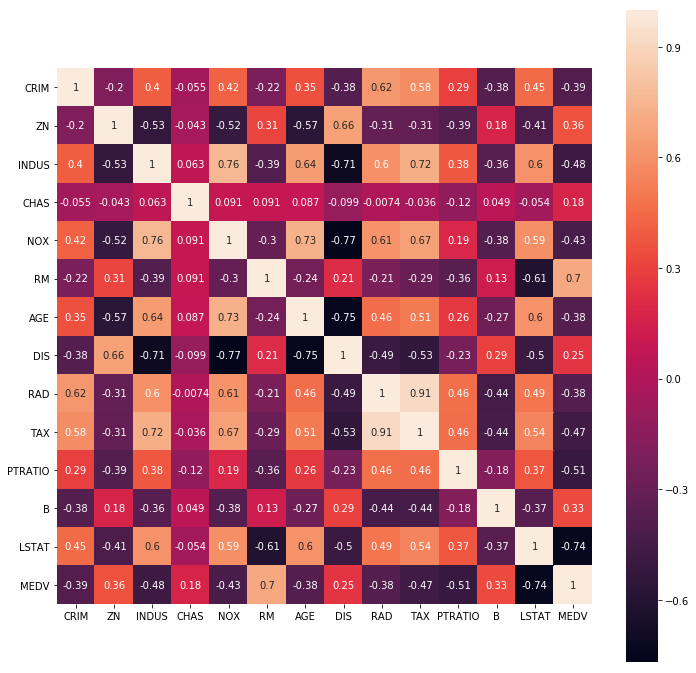

In [3]:
# Load the data into a DataFrame
boston_df = pd.DataFrame(columns=boston.feature_names, data=boston.data)
boston_df['MEDV'] = boston.target

# Correlation between features
cm = np.corrcoef(boston_df.values.T)
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(cm, cbar=True, annot=True, square=True, 
            yticklabels=boston_df.columns, xticklabels=boston_df.columns, ax=ax)

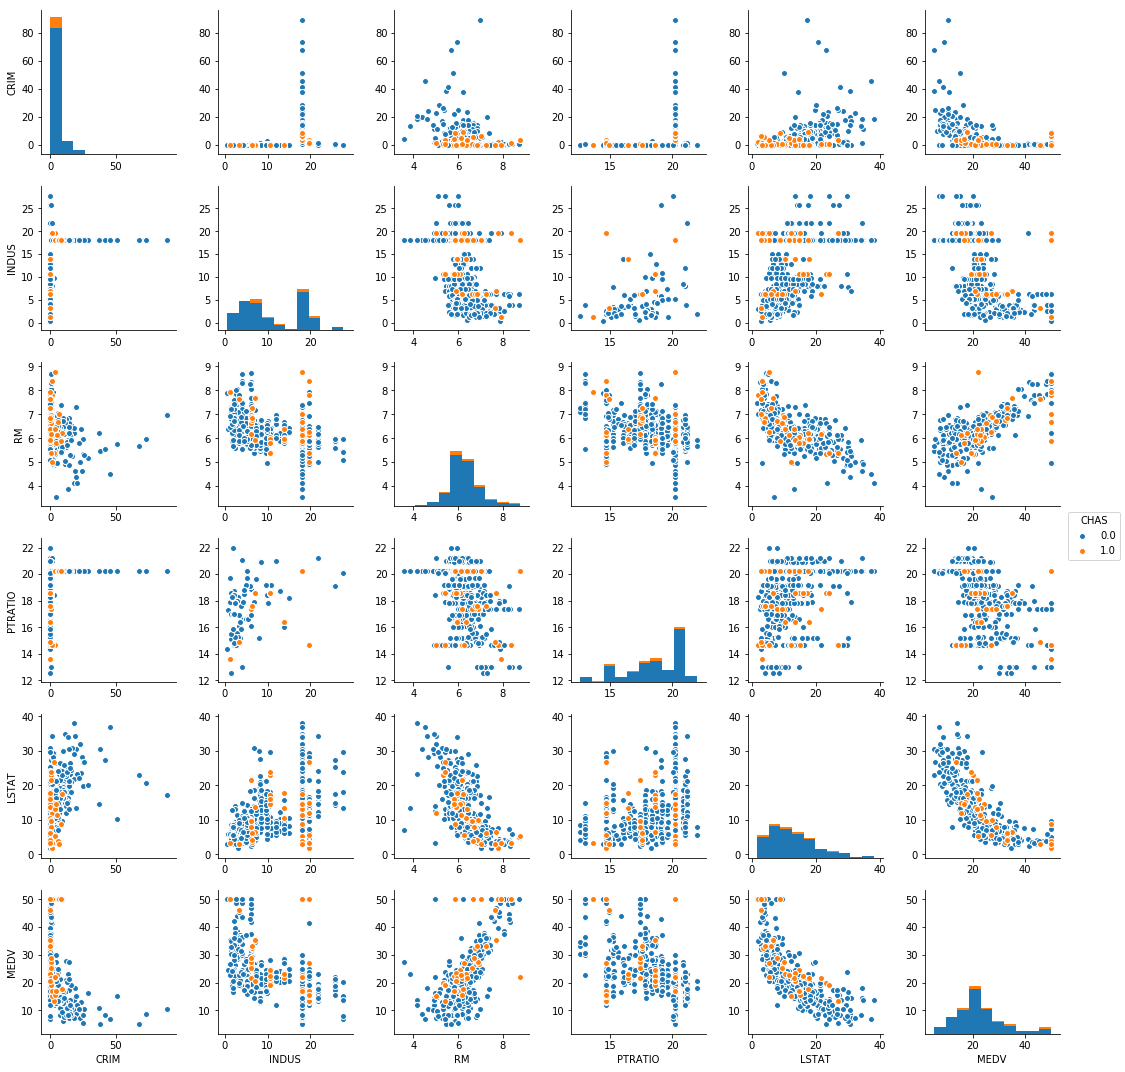

In [4]:
# Pairplot of relationship between selected features
cols = ['CRIM', 'INDUS', 'RM', 'PTRATIO', 'LSTAT', 'CHAS', 'MEDV']
vars = ['CRIM', 'INDUS', 'RM', 'PTRATIO', 'LSTAT', 'MEDV']
sns.pairplot(boston_df[cols], hue='CHAS', vars=vars)

In [5]:
# Utility function to fit and evaluate a linear model
def fit_and_evaluate_lm(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Intercept & coefficients
    print('Intercept:', model.intercept_)
    print('Coefficients:', model.coef_)
    
    # Evaluation
    print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred), 
        mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
    
    return (y_train_pred, y_test_pred)

# Utility function to plot the residuals of linear model
def plot_residuals(y_train_pred, y_test_pred, y_train, y_test, xmin, xmax):
    plt.scatter(y_train_pred, y_train_pred - y_train, label='Training data', 
            c='steelblue', marker='o', edgecolor='white')
    plt.scatter(y_test_pred, y_test_pred - y_test, label='Test data', 
            c='limegreen', marker='s', edgecolor='white')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=xmin, xmax=xmax, color='black', lw=2)
    plt.xlim([xmin, xmax])
    plt.show()

### Linear regression

Intercept: 37.9925927703
Coefficients: [ -1.19858618e-01   4.44233009e-02   1.18612465e-02   2.51295058e+00
  -1.62710374e+01   3.84909910e+00  -9.85471557e-03  -1.50002715e+00
   2.41507916e-01  -1.10671867e-02  -1.01897720e+00   6.95273216e-03
  -4.88110587e-01]
MSE train: 19.966, test: 27.184
R^2 train: 0.764, test: 0.674


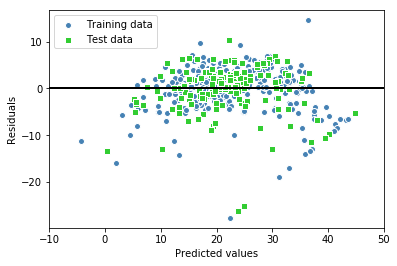

In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

# Fitting and evaluation
lr = LinearRegression()
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train, X_test, y_train, y_test, lr)

# Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

### Linear regression with standardized values (any improvement?) 
Result: Same r2 score as original linear regression

Intercept: 22.745480226
Coefficients: [-0.99884541  1.04926169  0.08283818  0.61938203 -1.87828363  2.69828142
 -0.27592019 -3.09716434  2.09139628 -1.88530946 -2.26382523  0.59446503
 -3.45020002]
MSE train: 19.966, test: 27.184
R^2 train: 0.764, test: 0.674


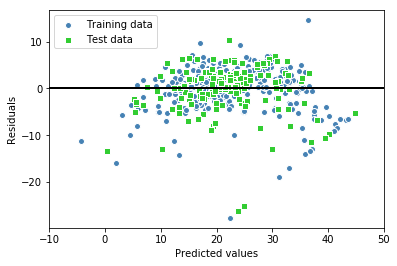

In [7]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

# Fitting and evaluation
lr = LinearRegression()
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train_sd, X_test_sd, y_train, y_test, lr)

# Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

### Linear regression with log transformation (any improvement?)
Result: Better r2 score than original linear regression

Intercept: 100.011127278
Coefficients: [ -1.21478698  -0.03836944  -1.30069497   3.28382778 -23.39461634
  16.06107772   0.43980852  -8.19184473   2.57159627  -3.05525343
 -16.8592763    0.49526907 -10.10684822]
MSE train: 15.757, test: 23.297
R^2 train: 0.814, test: 0.720


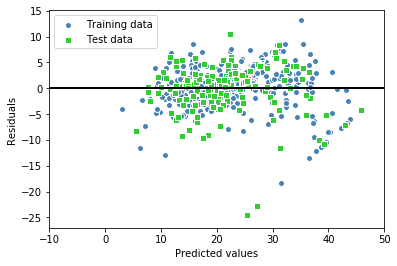

In [8]:
# Train/test split + log transformation on X
X_train, X_test, y_train, y_test = train_test_split(np.log1p(boston.data), boston.target, 
                                                    test_size=0.3, random_state=0)

# Fitting and evaluation
lr = LinearRegression()
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train, X_test, y_train, y_test, lr)

# Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

### Linear regression with PCA (any improvement?)
Result: r2 score lower than original linear regression

PCA explained variances: [ 0.46258773  0.10821241  0.09877686  0.07312902  0.06280233  0.05324576
  0.04261225]
PCA number of components: 7
Intercept: 22.745480226
Coefficients: [-2.37266325  2.70266357  3.47985379 -0.23317115 -1.5608932  -0.56799467
 -0.21134992]
MSE train: 22.796, test: 31.822
R^2 train: 0.731, test: 0.618


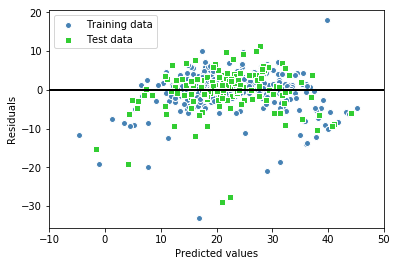

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

# PCA
pca = PCA(n_components=0.9, random_state=0)
X_train_pca = pca.fit_transform(X_train_sd)
X_test_pca = pca.transform(X_test_sd)
print('PCA explained variances:', pca.explained_variance_ratio_)
print('PCA number of components:', pca.n_components_)

# Fitting and evaluation
lr = LinearRegression()
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train_pca, X_test_pca, y_train, y_test, lr)

# Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

### Linear regression with L1 regularization (Lasso)
Result: r2 score lower than original linear regression

Intercept: 44.9784794381
Coefficients: [-0.06604046  0.04833799 -0.          0.         -0.          0.86400332
  0.01220969 -0.75136746  0.20014187 -0.01394771 -0.84646329  0.00676481
 -0.73309183]
MSE train: 24.720, test: 32.355
R^2 train: 0.708, test: 0.611
Rˆ2 CV: 0.672579562972


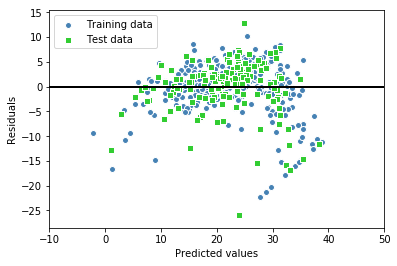

In [41]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

# Fitting and evaluation
lr = Lasso(alpha=1.0)
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train, X_test, y_train, y_test, lr)

# CV evaluation
print('Rˆ2 CV:', np.mean(cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)))

# Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

### Linear regression with L1 regularization (with parameter tuning + log transformation)
Result: Ordinary linear regression with feature selection + log transformation produces the best r2 score

*Tuning*
Alpha: 0.00644193273828
R^2: 0.813361740485
Selected features: ['CRIM' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B'
 'LSTAT']

*Lasso Evaluation*
Intercept: 95.866582032
Coefficients: [ -1.23802463  -1.43685658   3.17003445 -16.2548835   15.14404209
   0.37421347  -7.67619065   2.39269162  -3.0892184  -15.58993077
   0.49035521 -10.32436334]
MSE train: 15.820, test: 23.644
R^2 train: 0.813, test: 0.716


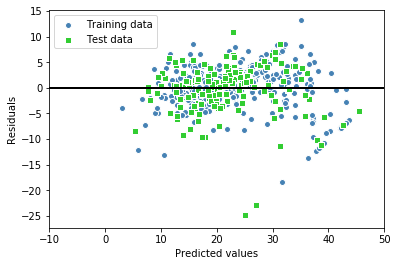


*Linear Regression Evaluation*
Intercept: 99.6496642892
Coefficients: [ -1.22158022  -1.27057116   3.28499028 -23.29859524  16.0330078
   0.44942143  -8.24671149   2.57423207  -3.09051841 -16.68382491
   0.49463191 -10.10618853]
MSE train: 15.759, test: 23.256
R^2 train: 0.814, test: 0.721


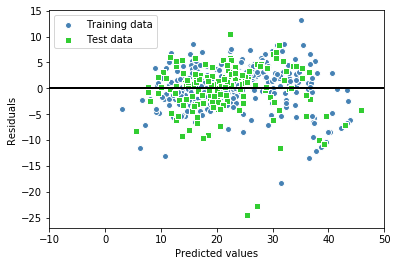

In [47]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(np.log1p(boston.data), boston.target, 
                                                    test_size=0.3, random_state=0)

# CV fitting and parameter tuning
cv = LassoCV(random_state=0, cv=5)
cv.fit(X_train, y_train)
print('*Tuning*')
print('Alpha:', cv.alpha_)
print('R^2:', cv.score(X_train, y_train))

# Feature selection
sel_features = cv.coef_ != 0
print('Selected features:', boston.feature_names[sel_features])

# Lasso fitting and evaluation
lasso = Lasso(alpha=cv.alpha_)
print('\n*Lasso Evaluation*')
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train[:, sel_features], X_test[:, sel_features], 
                                                y_train, y_test, lasso)

# Lasso Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

# Linear regression fitting and evaluation
lr = LinearRegression()
print('\n*Linear Regression Evaluation*')
y_train_pred, y_test_pred = fit_and_evaluate_lm(X_train[:, sel_features], X_test[:, sel_features], 
                                                y_train, y_test, lr)

# Linear regression Residuals
plot_residuals(y_train_pred, y_test_pred, y_train, y_test, -10, 50)

